# Video Movement Analysis Example

In this notebook, we use **optical flow** to analyze motion in a video. Optical flow computes an apparent motion vector for each pixel between frames. We'll use Farneback's dense optical flow algorithm to visualize motion and quantify movement. (Refer to the https://www.geeksforgeeks.org/python-opencv-dense-optical-flow/ for further reading.)


In [ ]:
# Install necessary libraries (uncomment if needed)
!pip install opencv-python imageio 'imageio[ffmpeg]' 'imageio[pyav]'


[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: pip install --upgrade pip


In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import imageio
%matplotlib inline

## Load Video and Compute Optical Flow

We'll use a sample video. If you have your own video, you can replace the source. Here, we use an example video (a flying bird) provided by the `imageio` library. We will compute the optical flow between consecutive frames in the video.

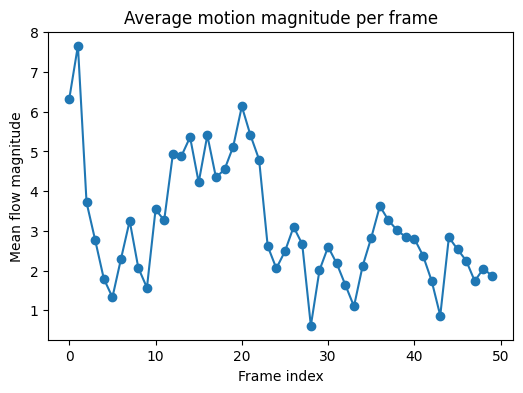

In [4]:
# Load a sample video using imageio
reader = imageio.get_reader('imageio:cockatoo.mp4')  # cockatoo flying video

flow_images = []
motion_mags = []

# Parameters for Farneback optical flow
fb_params = dict(pyr_scale=0.5, levels=3, winsize=15, iterations=3,
                 poly_n=5, poly_sigma=1.2, flags=0)

prev_gray = None
for i, frame in enumerate(reader):
    # Convert frame to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)
    if prev_gray is None:
        prev_gray = gray
        continue
    # Calculate optical flow from prev_gray to gray
    flow = cv2.calcOpticalFlowFarneback(prev_gray, gray, None, 
                                       fb_params['pyr_scale'], fb_params['levels'], fb_params['winsize'], 
                                       fb_params['iterations'], fb_params['poly_n'], fb_params['poly_sigma'], fb_params['flags'])
    # Compute flow magnitude and angle
    mag, ang = cv2.cartToPolar(flow[...,0], flow[...,1])
    motion_mags.append(mag.mean())
    
    # Visualize flow at a couple of frames
    if i == 20 or i == 40:
        # Create HSV image for visualization
        hsv = np.zeros((*gray.shape, 3), dtype=np.uint8)
        hsv[...,1] = 255
        hsv[...,0] = ang * 180 / np.pi / 2
        hsv[...,2] = cv2.normalize(mag, None, 0, 255, cv2.NORM_MINMAX)
        flow_bgr = cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)
        flow_images.append((i, flow_bgr))
    
    prev_gray = gray
    if i >= 50:
        break

# Plot average motion magnitude over frames
plt.figure(figsize=(6,4))
plt.plot(motion_mags, marker='o')
plt.title('Average motion magnitude per frame')
plt.xlabel('Frame index')
plt.ylabel('Mean flow magnitude')
plt.show()

In the plot above, you can see how the overall motion changes over time in the video (e.g., the curve might go up when the bird flaps faster or moves rapidly).

Next, let's visualize the optical flow field at specific frames. We will use a color representation where hue indicates direction of motion and brightness indicates magnitude.

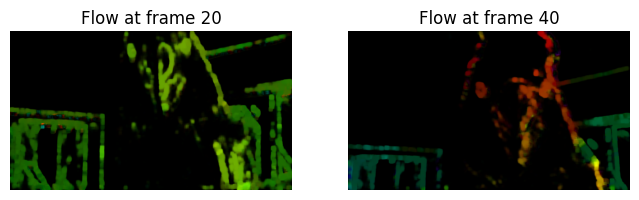

In [5]:
# Display optical flow visualization for selected frames
plt.figure(figsize=(8,4))
for idx, (frame_no, flow_img) in enumerate(flow_images):
    plt.subplot(1, len(flow_images), idx+1)
    plt.imshow(flow_img)
    plt.title(f"Flow at frame {frame_no}")
    plt.axis('off')
plt.show()

In the above images, each pixel's color shows the motion at that location: for example, arrows pointing right might appear as one color (e.g., cyan) while leftward motion is another (e.g., orange), and the intensity of the color shows how fast the movement is.

**Summary:** Optical flow provides a detailed picture of movement in video. We can use it to measure speeds, detect moving regions, or even classify actions. For instance, one could build a simple action detector that differentiates "running" vs "walking" by looking at the magnitude of optical flow. For more sophisticated tasks, specialized models or deep learning approaches would be used, but optical flow is a fundamental building block for motion analysis.